
Instructions for running code: Run each cell in order. The first three cells must be run before calling the data processing and wpm data processing class
---


This code creates a class for creating the CNN model. 2 Models are created, one for the words per song model and one for the Million song dataset. This two different models are needed becasue of the final layer within the model as both models have a different number of expected genre outputs.

In [0]:
from __future__ import print_function
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten, LeakyReLU
from keras.utils import to_categorical
from keras import optimizers
import tensorflow as tf

class CNN():
	
# Million song dataset CNN
	def model(self,x_train,x_test,y_train,y_test):
# Reshapes the input data as discussed within the synthesis implementation (data pre-processing)
		x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
		x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
	# Sets the optimal learning rate of Stochastic gradient descent (the learning optimizer)
		sgd = optimizers.SGD(lr=0.01)
	# Creates the CNN model based upon the optimal model architecture 
		model = Sequential()
		model.add(Conv1D(filters= 32 , kernel_size=3, activation = LeakyReLU(alpha=0.1), input_shape = (x_train.shape[1],1)))
		model.add(Conv1D(filters = 128, kernel_size=3, activation =LeakyReLU(alpha=0.1)))
		model.add(MaxPooling1D(pool_size=2))
		model.add(Dropout(0.25))
		model.add(Flatten())
		model.add(Dense(100,activation=LeakyReLU(alpha=0.1)))
		model.add(Dropout(0.5))
	# 10 neruons to represent the 10 possible genres
		model.add(Dense(10,activation='softmax'))
		model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
		# Fits the model using 40 epochs as it was previously defined to be the optimal number
		model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),verbose=0)
		loss,accuracy = model.evaluate(x_test,y_test,batch_size  = 32,verbose=0)
		print(model.summary())
		# Returns the loss and accuracy of the model
		return loss, accuracy

# Produces a CNN model for the words per song dataset
	def wpm_model(self,x_train,x_test,y_train,y_test):

		x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
		x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
		sgd = optimizers.SGD(lr=0.01)
		model = Sequential()
		model.add(Conv1D(filters= 32 , kernel_size=3, activation = LeakyReLU(alpha=0.1), input_shape = (x_train.shape[1],1)))
		model.add(Conv1D(filters = 128, kernel_size=3, activation =LeakyReLU(alpha=0.1)))
		model.add(MaxPooling1D(pool_size=2))
		model.add(Dropout(0.25))
		model.add(Flatten())
		model.add(Dense(100,activation=LeakyReLU(alpha=0.1)))
		model.add(Dropout(0.5))
	# Uses 7 neurons within the final layer to represent the 7 output genres within the 
	# words per song dataset
		model.add(Dense(7,activation='softmax'))
		model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
		model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),verbose=0)
		loss,accuracy = model.evaluate(x_test,y_test,batch_size  = 32,verbose=0)

		return loss, accuracy

Using TensorFlow backend.


Function to create the Artificial Neural Network

In [0]:
from __future__ import print_function
import keras 
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras import optimizers
import tensorflow as tf


class ANN():
# Defines the SGD learning rate
	def __init__(self):
		self.sgd = optimizers.SGD(lr=0.01)

# Creates the model for the Million Song Dataset based on the optimal model architecture
	def data_model(self,x_train,x_test,y_train, y_test):
		model1 = Sequential()
		model1.add(Dense(units = 64, activation =LeakyReLU(alpha=0.1), input_dim = x_train.shape[1]))
		model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
		model1.add(Dense(units = 256, activation = LeakyReLU(alpha=0.1)))
		model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
		# 10 neurons to represent the 10 possible output genres
		model1.add(Dense(units=10,activation='softmax'))
		model1.compile(loss='categorical_crossentropy',optimizer=self.sgd,metrics=['accuracy'])
	# Trained to 40 epochs as previously defined
		model1.fit(x_train,y_train,epochs=40, batch_size= 32,verbose=0)
		loss, accuracy = model1.evaluate(x_test,y_test,batch_size  = 32,verbose=0)
		print(model1.summary())
		# Returns the loss and accuracy of the model
		return loss, accuracy

# Creation of the model for the Words per song dataset
	def wpm_model(self,x_train,x_test,y_train, y_test):
		model1 = Sequential()
		model1.add(Dense(units = 64, activation =LeakyReLU(alpha=0.1), input_dim = x_train.shape[1]))
		model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
		model1.add(Dense(units = 256, activation = LeakyReLU(alpha=0.1)))
		model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
	# 7 neurons within the final layer to represent the 7 possible output genres in the words
	# per song dataset
		model1.add(Dense(units=7,activation='softmax'))
		model1.compile(loss='categorical_crossentropy',optimizer=self.sgd,metrics=['accuracy'])
		model1.fit(x_train,y_train,epochs=40, batch_size= 32,verbose=0)
		loss, accuracy = model1.evaluate(x_test,y_test,batch_size  = 32,verbose=0)
		return loss, accuracy


Function to create the autoencoder

In [0]:
from __future__ import print_function
import keras 
from keras.models import Model
from keras.layers import Input
from keras import optimizers
import tensorflow as tf

class AutoEncoder():
# Takes the parameter of the input and testing data
	def model(self,x_train,x_test):
		# Defines the shape and parameters of the model
		x = Input(shape=(x_train.shape[1],))
	# Defines the layers within the encoder
		encoded = Dense(2,activation = LeakyReLU(alpha=0.1))(x)
	# Defines the decoding layer and the number of expected outputs
		decoded = Dense(x_train.shape[1], activation = 'sigmoid')(encoded)
		autoencoder = Model(x,decoded)
		encoder =Model(x,encoded)
		encoded_input = Input(shape=(2,))
		decoder_layer = autoencoder.layers[-1]
		sgd = optimizers.SGD(lr=0.01)
	# Creates the autoencoder model based upon the defined parameters
		decoder = Model(encoded_input,decoder_layer(encoded_input))
	# Compiles and trains the model
		autoencoder.compile(optimizer=sgd,loss='mse')
		autoencoder.fit(x_train,x_train,epochs=100,shuffle=True,
		                validation_data=(x_test,x_test),verbose=0)
	# Calls the predict function on hte encoding part of the autoecoder to produce 2 output variables
		test = encoder.predict(x_test)
	# Returns the two output prediction values
		return test[:,0],test[:,1]

Function to call the Neural models using the Million Song Dataset. The results will be produced below. This class calls the models previously defined above. 

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                1472      
_________________________________________________________________
dense_38 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_39 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
Total params: 77,002
Trainable params: 77,002
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_10"
_________________________________________________________________
Layer (type)          

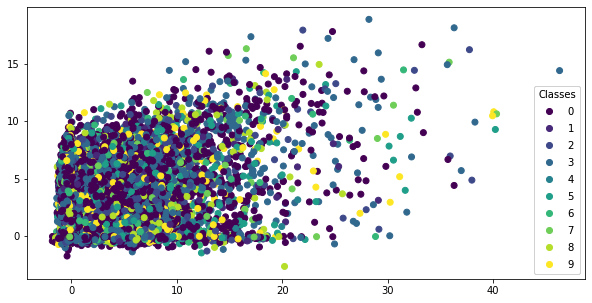

<Figure size 21600x14400 with 0 Axes>

ANN accuracy: 0.605620801448822
 ANN loss: 1.135242909553067
CNN accuracy: 0.5792785286903381
 CNN loss: 1.2100133244623275


In [0]:
# Importing of the libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,5]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
# Dont uncomment unless running the script locally
# from ANN import ANN
# from Autoencoder import AutoEncoder
# from CNN import CNN

# Creates the object class
class Data_Processing:

# Loads in the Million Song Dataset
	def load_data(self,dataset):
		# Uses try and catch statements to ensure the dataset is loaded in and correct
		try:
			data = pd.read_csv(dataset)
			if data.shape != (59600, 34):
				raise ValueError       
				print("Incorrect dataset loaded!")
				# sys.exit(1)
			return data
# Throws a file not found error if the dataset is not located
		except FileNotFoundError:
			print( "Dataset not located")
			raise FileNotFoundError
			# sys.exit(1)

# function to convert the genre strings into numerical categories. Needed for the machine 
# learning models
	def gen_to_numerical(self,data):
		data['genre'] = data['genre'].astype('category')
		data['new_genre'] = data['genre'].cat.codes
		return data

# Function to remove the irrelevant columns not needed from the input data
	def input_data(self,data):
		in_data = data.drop(columns=['genre','title','track_id','artist_name','new_genre'])
		in_data_std = StandardScaler().fit_transform(in_data)
		return in_data_std

# Function to apply PCA to the dataset
	def dim_reduce(self,data):

		pca = PCA(.95)
		pca.fit(data)
		pca_data = pca.transform(data)
	
		return pca_data

# Function to apply the data pre processing methods. Function used to reduce the 
# number of calls used within the main method
	def pre_processing(self,data):
		data = self.gen_to_numerical(data)
		data = self.input_data(data)
		pca_data = self.dim_reduce(data)
		return pca_data

# Splits the input dataset using a train and test split
	def split_data(self,in_data,data):
		labels = data['new_genre']
		label_cat = to_categorical(labels) 
		x_train,x_test,y_train,y_test = train_test_split(in_data,label_cat, test_size = 0.2)
		x_train_l, x_test_l, y_train_l,y_test_l = train_test_split(in_data,labels,test_size = 0.2)

		return x_train,x_test,y_train, y_test, x_train_l,x_test_l, y_train_l,y_test_l 
# Function to call the ANN using the training and testing data. Returns the loss and 
# accuracy of the model
	def ann(self,x_train,x_test,y_train, y_test):
		a_nn = ANN()
		self.loss, self.accuracy = a_nn.data_model(x_train,x_test,y_train, y_test)
		return self.loss, self.accuracy

# Function to run the Autoencoder. Returns the two values used to plot the groups on the scatterplot
	def autoencoder(self,x_train,x_test):
		encode = AutoEncoder()
		self.x_cluster,self.y_cluster = encode.model(x_train,x_test)
		return self.x_cluster, self.y_cluster

# Function to run the CNN. Returns the loss and accuracy of the model
	def cnn(self,x_train,x_test, y_train, y_test):
		cnn = CNN()
		self.cnn_loss, self.cnn_accuracy = cnn.model(x_train,x_test, y_train, y_test)
		return self.cnn_loss, self.cnn_accuracy

# Function to display the loss and accuracy of the CNN and ANN
	def disp_results(self,accuracy,loss, cnn_accuracy, cnn_loss):
		print("ANN accuracy: "+str(accuracy)+ "\n ANN loss: "+str(loss) )
		print("CNN accuracy: "+str(cnn_accuracy)+ "\n CNN loss: "+ str(cnn_loss))

# Function to display the clustering of the datapoints output by the Autoencoder
	def disp_cluster(self,x_cluster,y_cluster,y_test_l):
		fig, axis = plt.subplots()
		scatter =axis.scatter(x_cluster,y_cluster,c=y_test_l)
		plt.figure(figsize=(300,200))
		legend1 = axis.legend(*scatter.legend_elements(),
												loc="lower right", title="Classes")
		axis.add_artist(legend1)
		plt.show()

# Main method to call the functions defined above
if __name__ == '__main__':
	# Creates the class object
	obj = Data_Processing()
#  Loads the dataset
	data = obj.load_data('msd_genre_dataset.csv')
#  Applys the methods of data pre-processing 
	pca_data = obj.pre_processing(data)
#  Performs the train and test data splits
	x_train,x_test,y_train, y_test, x_train_l,x_test_l, y_train_l,y_test_l = obj.split_data(pca_data,data)
# Calls the ANN and produces a loss and accuracy
	loss,accuracy = obj.ann(x_train,x_test,y_train, y_test)
#  Calls the Autoencoder function
	x_cluster, y_cluster = obj.autoencoder(x_train,x_test)
# Calls the CNN function to produce a loss and accuracy measure for the model
	cnn_loss, cnn_accuracy = obj.cnn(x_train,x_test,y_train, y_test)
#  Displays the output of the autencoder on a scatterplot
	obj.disp_cluster(x_cluster,y_cluster,y_test_l)
#  Displays the accuracy and loss of the CNN and ANN
	obj.disp_results(accuracy,loss,cnn_accuracy,cnn_loss)



The script used for the words per song dataset. The results of three machine learning models will be produced below. This class calls the models previously defined in the classes above. 

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


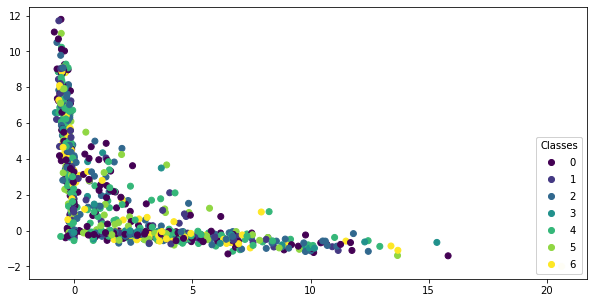

<Figure size 21600x14400 with 0 Axes>

ANN accuracy: 0.6176470518112183
 ANN loss: 1.068727787803201
CNN accuracy: 0.5870097875595093
 CNN loss: 1.179855042812871


In [0]:
# Importing of the relevant libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,5]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

# Leave these commented unless running the script locally
# from ANN import ANN
# from Autoencoder import AutoEncoder
# from CNN import CNN

class Wpm_Processing:

# Try to load the words per song dataset
	def load_data(self,dataset):
		# Try and catch statement used incase the dataset can't be loaded
		try:
			data = pd.read_csv(dataset)
		# An additional check to ensure the dataset is the right shape
			if data.shape != (4077,35):
				# Rasises and error and prints an error message if the wrong dataset is loaded
				# as per the testing
				raise ValueError       
				print("Incorrect dataset loaded!")
			# 	# sys.exit(1)
			return data
		# Raises a file not found error if the dataset can't be located
		except FileNotFoundError:
			print( "Dataset not located")
			raise FileNotFoundError
			# sys.exit(1)

# Function to convert the string categories into numerical category format
	def gen_to_numerical(self,data):

		data['genre'] = data['genre'].astype('category')
		data['new_genre'] = data['genre'].cat.codes

		return data

# Pre-processes the input data to remove the columns not needed within the dataset
	def input_data(self,data):

		in_data = data.drop(columns=['genre','title','track_id','artist_name','new_genre'])
		in_data_std = StandardScaler().fit_transform(in_data)
		return in_data_std

# Performs PCA on the data as outlined within the implementation (section feature reduction)
	def dim_reduce(self,data):

		pca = PCA(.95)
		pca.fit(data)
		pca_data = pca.transform(data)

		return pca_data

# Function to call the three pre-processing functions. Uses a nested function to tidy up the number of 
# calls within the main method
	def pre_processing(self,data):
		data = self.gen_to_numerical(data)
		data = self.input_data(data)
		pca_data = self.dim_reduce(data)
	
		return pca_data

# Splits the data using a 80 train 20 test split. Converts the expected output into categorical format
	def split_data(self,in_data,data):
		labels = data['new_genre']
		label_cat = to_categorical(labels) 
		x_train,x_test,y_train,y_test = train_test_split(in_data,label_cat, test_size = 0.2)
		x_train_l, x_test_l, y_train_l,y_test_l = train_test_split(in_data,labels,test_size = 0.2)

		return x_train,x_test,y_train, y_test, x_train_l,x_test_l, y_train_l,y_test_l 

# Function to call the Aritifical Neural Network. The model returns the loss and accuarcy measurement (i.e. how accurate it was)
	def ann(self,x_train,x_test,y_train, y_test):
		a_nn = ANN()
		self.loss, self.accuracy = a_nn.wpm_model(x_train,x_test,y_train, y_test)
		return self.loss, self.accuracy

# Function to call the Autoencoder method. Returns the two values used to plot the data value
	def autoencoder(self,x_train,x_test):
		encode = AutoEncoder()
		self.x_cluster,self.y_cluster = encode.model(x_train,x_test)
		return self.x_cluster, self.y_cluster

# Function to call the Convolutional Neural Network. Returns two values the loss and accuracy.
	def cnn(self,x_train,x_test, y_train, y_test):
		cnn = CNN()
		self.cnn_loss, self.cnn_accuracy = cnn.wpm_model(x_train,x_test, y_train, y_test)
		return self.cnn_loss, self.cnn_accuracy  
	
# Function to display the results of both the ANN and CNN 
	def disp_results(self,accuracy,loss, cnn_accuracy, cnn_loss):
		print("ANN accuracy: "+str(accuracy)+ "\n ANN loss: "+str(loss) )
		print("CNN accuracy: "+str(cnn_accuracy)+ "\n CNN loss: "+ str(cnn_loss))

# Function to display a scatterplot of the clustering points 
	def disp_cluster(self,x_cluster,y_cluster,y_test_l):
		fig, axis = plt.subplots()
		scatter =axis.scatter(x_cluster,y_cluster,c=y_test_l)
		plt.figure(figsize=(300,200))
		legend1 = axis.legend(*scatter.legend_elements(),
												loc="lower right", title="Classes")
		axis.add_artist(legend1)
		plt.show()

# Main method to call the functions needed to produce the classification outputs.
if __name__ == '__main__':
	# Creates the class object
	 obj = Wpm_Processing()
	# Loads in the words per song dataset
	 data = obj.load_data('wpmdata.csv')
	# Performs the data pre-processing
	 pca_data = obj.pre_processing(data)
	# Performs the data train and test split
	 x_train,x_test,y_train, y_test, x_train_l,x_test_l, y_train_l,y_test_l = obj.split_data(pca_data,data)
	# Runs the ANN using the training and test data
	 loss,accuracy = obj.ann(x_train,x_test,y_train, y_test)
	# Runs the autoencoder
	 x_cluster, y_cluster = obj.autoencoder(x_train,x_test)
	# Runs the CNN
	 cnn_loss, cnn_accuracy = obj.cnn(x_train,x_test,y_train, y_test)
	#  Displays the scatterplot of the autoencoder
	 obj.disp_cluster(x_cluster,y_cluster,y_test_l)
	# Diplays the results of the CNN and ANN
	 obj.disp_results(accuracy,loss,cnn_accuracy,cnn_loss)